# (Generalized) Pattern Lattice Builder (PLB) runner on bare words

developed by Kow Kuroda (kow.kuroda@gmail.com)

Creation
- 2024/11/01

Modifications
- 2024/11/02, 11
- 2025/09/17 renamed to gPLB-runner-on-bare-items.ipynb;
- 2025/10/17 updated for revised version of gPLB with p_metric;

In [1]:
## imports
import gPLB as plb

## The following needs to be True only for debugging/development.
re_import_module = True
if re_import_module:
    import importlib
    importlib.reload (plb)

In [2]:
## inspect plb.py
import pprint as pp
content_check = False
if content_check:
    pp.pprint(dir(plb))

In [3]:
## Parameters

## internal variables
comment_escapes  = ['#', '%']

## parameters for PLB
gap_marks       = [ "_", "…" ]
gap_mark        = gap_marks[0]
tracer          = "~"

## managemental
verbose = True

## if use multiprocess module
use_mp = True

## if Generalized Pattern Lattice is used nor not
generalities = [0,1,2,3]
generality   = generalities[2]

## if instantiation check is reflexive: effective under generalized
reflexive       = True

## if node pooling is reductive
reductive       = True

## key
p_metrics = ['rank', 'gap_size', 'size']
p_metric  = p_metrics[0]

## if robust Z-score is used instead of normal Z-score
use_robust_zscore   = True

## select the bases of z-scores: link sources or link targets
zscores_from_targets = False

### settings for drawing
## draw individual lattices
draw_individual_lattices   = False
draw_sample_lattices_only  = True
sample_lattice_n           = 3

## full display for merged pattern lattice
draw_full_version_for_merged = False

## Graph drawing parameters
layout = "Multi_partite"

## key of Multi-partite Graph (MPG) layout
MPG_keys = ['gap_size', 'rank', 'size']
MPG_key  = MPG_keys[0]

## settings for CJK font display
## N.B. phonetic symbols are likely to be incompatible with CJK-ready font
use_multibyte_chars = False

In [4]:
## parameters for data sampling
min_len   = 3
max_len   = 5
sample_n  = 9

In [5]:
## set up font
import matplotlib
from matplotlib import font_manager as Font_manager

if use_multibyte_chars:
    ## select font
    multibyte_font_names = [    "IPAexGothic",  # 0 Multi-platform font
                                "Hiragino sans" # 1 Mac only
                            ]
    multibyte_font_name  = multibyte_font_names[0]
    ## tell where target fonts are
    system_font_dir = "/System/Library/Fonts/"
    user_font_dir = "/Library/Fonts/"
    # use the version installed via TeXLive
    user_font_dir2 = "/usr/local/texlive/2013/texmf-dist/fonts/truetype/public/ipaex/"
    if multibyte_font_name == "IPAexGothic":
        try:
            Font_manager.fontManager.addfont(f"{user_font_dir}ipaexg.ttf")
        except FileNotFoundError:
            Font_manager.fontManager.addfont(f"{user_font_dir2}ipaexg.ttf")
    elif multibyte_font_name == "Hiragino sans":
        Font_manager.fontManager.addfont(f"{system_font_dir}ヒラギノ角ゴシック W0.ttc")
    ## check result
    matplotlib.rc('font', family = multibyte_font_name)
else:
    multibyte_font_name = None
    matplotlib.rcParams['font.family'] = "Sans-serif"
##
print(f"multibyte_font_name: {multibyte_font_name}")
print(f"matplotlib.rcParams['font.family']: {matplotlib.rcParams['font.family']}")    

multibyte_font_name: None
matplotlib.rcParams['font.family']: ['Sans-serif']


In [6]:
## graph layout selection
graph_layouts = [   'Multi_partite', # 0
                    'Graphviz', # 1
                    'ARF', # 2
                    'Fruchterman_Reingold', # 3
                    'Kamada_Kawai', # 4
                    'Spring', # 5
                    'Planar', # 6
                    'Circular', # 7
                    'Shell', # 8
                    'Planar', # 9 [often fails to work]
                    # 'Breadth-First Search', # fails work
                 ]
#
graph_layout = graph_layouts[0]
print(f"graph_layout: {graph_layout}")

graph_layout: Multi_partite


# Preparation

In [7]:
## select target file
from pathlib import Path
wd = Path("./data-raw-words")
data_files = list(wd.glob('*.txt'))
data_file  = data_files[0]
print(f"read data from: {data_file}")

read data from: data-raw-words/English-Words.txt


In [8]:
if str(data_file).endswith(".csv"):
    field_seps          = r",;"
    sep2_is_suppressive = True
else:
    field_seps = ""
    sep2_is_suppressive = False
print(f"field_seps: '{field_seps}'")

field_seps: ''


In [9]:
## reading data
with open(data_file, encoding = "utf-8") as file:
    lines = [ line.strip() for line in file.readlines() if len(line) > 0 ]

## discard comment lines that start with #
lines = [ plb.strip_comment(line, comment_escapes) for line in lines ]
print(lines)

['a', 'aah', 'aahed', 'aahing', 'aahs', 'aardvark', 'aardvarks', 'aardwolf', 'ab', 'abaci', 'aback', 'abacus', 'abacuses', 'abaft', 'abalone', 'abalones', 'abandon', 'abandoned', 'abandonedly', 'abandonee', 'abandoner', 'abandoners', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abase', 'abased', 'abasedly', 'abasement', 'abaser', 'abasers', 'abases', 'abash', 'abashed', 'abashedly', 'abashes', 'abashing', 'abashment', 'abashments', 'abasing', 'abatable', 'abate', 'abated', 'abatement', 'abatements', 'abater', 'abaters', 'abates', 'abating', 'abatis', 'abatises', 'abator', 'abattoir', 'abattoirs', 'abbacies', 'abbacy', 'abbatial', 'abbe', 'abbes', 'abbess', 'abbesses', 'abbey', 'abbeys', 'abbot', 'abbotcies', 'abbotcy', 'abbots', 'abbotship', 'abbotships', 'abbott', 'abbr', 'abbrev', 'abbreviate', 'abbreviated', 'abbreviates', 'abbreviating', 'abbreviation', 'abbreviations', 'abbreviator', 'abbreviators', 'abc', 'abdicable', 'abdicate', 'abdicated', 'abdicates', 'abdicating

In [10]:
## select targets by pattern matching
import re
selector = r".*f.*a.*n.*"
filtered_lines = [ w for w in lines if re.match(selector, w) ]
filtered_lines

['abortifacient',
 'acidification',
 'affectation',
 'affectations',
 'affiance',
 'affianced',
 'affiances',
 'affiancing',
 'affiant',
 'affiliating',
 'affiliation',
 'affiliations',
 'affirmance',
 'affirmation',
 'affirmations',
 'affirmativeness',
 'affixation',
 'afforestation',
 'affraying',
 'afghan',
 'afghani',
 'afghanis',
 'afghanistan',
 'afghans',
 'aflatoxin',
 'african',
 'africans',
 'afrikaans',
 'amplification',
 'amplifications',
 'artificialness',
 'avifauna',
 'beatification',
 'beautification',
 'befallen',
 'befalling',
 'beforehand',
 'benefaction',
 'benefactions',
 'beneficialness',
 'beneficiating',
 'bifurcating',
 'bifurcation',
 'bifurcations',
 'bioflavonoid',
 'boldfacing',
 'bouffant',
 'bouffants',
 'breakfasting',
 'buffaloing',
 'caftan',
 'caftans',
 'calcification',
 'calefacient',
 'californian',
 'californians',
 'camouflaging',
 'centrifugation',
 'certificating',
 'certification',
 'certifications',
 'chapfallen',
 'chieftain',
 'chieftaincie

In [11]:
## filtering data
filtered_lines = [ line for line in filtered_lines if len(line) >= min_len and len(line) <= max_len ]
filtered_lines

['fain',
 'faint',
 'fan',
 'fancy',
 'fanes',
 'fang',
 'fangs',
 'fanny',
 'fans',
 'faun',
 'fauna',
 'fauns',
 'fawn',
 'fawns',
 'fawny',
 'flan',
 'flank',
 'flans',
 'franc',
 'frank',
 'franz']

In [12]:
## sampling
import random
sampled_lines = random.sample(filtered_lines, sample_n)
sampled_lines
print("sampled lines")
pp.pprint(sampled_lines)

sampled lines
['faint', 'flan', 'fans', 'fauns', 'faun', 'fawny', 'fanes', 'fan', 'fangs']


In [13]:
## convert words into lists
import re
data = [ [ y for y in re.split(field_seps, x) if len(y) > 0 ] for x in sampled_lines ]
		 
## check result
import pprint as pp
pp.pprint(data)

[['f', 'a', 'i', 'n', 't'],
 ['f', 'l', 'a', 'n'],
 ['f', 'a', 'n', 's'],
 ['f', 'a', 'u', 'n', 's'],
 ['f', 'a', 'u', 'n'],
 ['f', 'a', 'w', 'n', 'y'],
 ['f', 'a', 'n', 'e', 's'],
 ['f', 'a', 'n'],
 ['f', 'a', 'n', 'g', 's']]


In [14]:
# Process Patter Lattice incrementally
lattice_build_is_stepwise = True

In [15]:
## build pattern lattices from data
gen_links_internally = False # Cruciall for memory conservation

null_pat = plb.Pattern([], gap_mark, tracer)
M = plb.PatternLattice(null_pat, generality = generality, p_metric = p_metric, check = False)
for i, item in enumerate(data):

    print(f"##building PatternLattice {i+1} from {item}")
    pat    = plb.Pattern(item, gap_mark, tracer)
    patlat = plb.PatternLattice(pat, generality = generality, reflexive = reflexive)
    if verbose:
        print(patlat)
    if draw_individual_lattices:
        patlat.draw_lattice (layout, MPG_key, generality = generality, zscores_from_targets = zscores_from_targets, auto_figsizing = True, font_name = multibyte_font_name)
    
    ## Merging pattern lattices
    print(f"##merging PatternLattices {i} and {i+1}")
    M = M.merge_with (patlat, gen_links_internally = gen_links_internally, generality = generality, reflexive = reflexive, reductive = reductive, use_mp = use_mp, show_steps = True, check = False)
    
    ## Delete used patlat
    patlat = None

    print(f"##finished step {i+1}")
    print(f"=================================\n")

##building PatternLattice 1 from ['f', 'a', 'i', 'n', 't']
PatternLattice ([Pattern ([('_', ['f']), ('_', ['a']), ('_', ['i']), ('_', ['n']), ('_', ['t'])]), Pattern ([('_', ['f']), ('_', ['a']), ('_', ['i']), ('_', ['n']), ('t', ['t'])]), Pattern ([('_', ['f']), ('_', ['a']), ('_', ['i']), ('n', ['n']), ('_', ['t'])]), Pattern ([('_', ['f']), ('_', ['a']), ('_', ['i']), ('n', ['n']), ('t', ['t'])]), Pattern ([('_', ['f']), ('_', ['a']), ('i', ['i']), ('_', ['n']), ('_', ['t'])]), Pattern ([('_', ['f']), ('_', ['a']), ('i', ['i']), ('_', ['n']), ('t', ['t'])]), Pattern ([('_', ['f']), ('_', ['a']), ('i', ['i']), ('n', ['n']), ('_', ['t'])]), Pattern ([('_', ['f']), ('_', ['a']), ('i', ['i']), ('n', ['n']), ('t', ['t'])]), Pattern ([('_', ['f']), ('a', ['a']), ('_', ['i']), ('_', ['n']), ('_', ['t'])]), Pattern ([('_', ['f']), ('a', ['a']), ('_', ['i']), ('_', ['n']), ('t', ['t'])]), Pattern ([('_', ['f']), ('a', ['a']), ('_', ['i']), ('n', ['n']), ('_', ['t'])]), Pattern ([('_', ['f'])

In [16]:
## The following process was isolated for memory conservation
if not gen_links_internally and len(M.links) == 0:
    print(f"##start generating links in delayed manner")
    M.update_links (reflexive = reflexive, check = False)

##start generating links in delayed manner


In [17]:
print(f"p_metric: {p_metric}")

p_metric: rank


In [18]:
## Calculate
plb.gen_zscores_from_targets_by (p_metric, M, gap_mark = gap_mark, tracer = tracer, use_robust_zscore = use_robust_zscore, check = False)
plb.gen_zscores_from_sources_by (p_metric, M, gap_mark = gap_mark, tracer = tracer, use_robust_zscore = use_robust_zscore, check = False)

#target   0: ('f', '_', '_') has 4 in-link(s) at rank 1 [z-score: -0.674]
#target   1: ('_', 'a', '_') has 4 in-link(s) at rank 1 [z-score: -0.674]
#target   2: ('_', '_', 'n') has 4 in-link(s) at rank 1 [z-score: -0.674]
#target   3: ('f', '_', 'n') has 3 in-link(s) at rank 2 [z-score: -1.124]
#target   4: ('f', 'a', '_') has 4 in-link(s) at rank 2 [z-score: -0.674]
#target   5: ('_', 'a', 'n') has 4 in-link(s) at rank 2 [z-score: -0.674]
#target   6: ('f', 'a', 'n') has 4 in-link(s) at rank 3 [z-score: -0.674]
#target   7: ('_', '_', '_') has 3 in-link(s) at rank 0 [z-score: -0.674]
#target   8: ('_', '_', 'u', '_') has 4 in-link(s) at rank 1 [z-score: -0.674]
#target   9: ('f', '_', '_', '_') has 24 in-link(s) at rank 1 [z-score: 12.815]
#target  10: ('_', '_', 'n', '_') has 8 in-link(s) at rank 1 [z-score: 2.023]
#target  11: ('_', 'a', '_', '_') has 16 in-link(s) at rank 1 [z-score: 7.419]
#target  12: ('_', 'l', '_', '_') has 3 in-link(s) at rank 1 [z-score: -1.349]
#target  13: 

In [19]:
## select z-score base
print(f"#zscores_from_targets: {zscores_from_targets}")
if zscores_from_targets:
    if use_robust_zscore:
        Link_bases = M.robust_zscores_from_targets
        print(f"robust z-scores are obtained from link_targets")
    else:
        Link_bases = M.zscores_from_targets
        print(f"normal z-scores are obtained from link_targets")
else:
    if use_robust_zscore:
        Link_bases = M.robust_zscores_from_sources
        print(f"robust z-scores are obtained from link_sources")
    else:
        Link_bases = M.zscores_from_sources
        print(f"normal z-scores are obtained from link_sources")

#zscores_from_targets: False
robust z-scores are obtained from link_sources


In [20]:
## check result
i = 0
for key, value in Link_bases.items():
    i += 1
    print(f"node {i:3d} {key} has z-score: {value: .4f}")

node   1 ('_', '_', '_') has z-score: -0.6745
node   2 ('f', '_', '_') has z-score: -1.3490
node   3 ('_', '_', 'n') has z-score: -1.3490
node   4 ('_', 'a', '_') has z-score: -1.3490
node   5 ('f', '_', 'n') has z-score: -1.3490
node   6 ('f', 'a', '_') has z-score: -1.3490
node   7 ('_', 'a', 'n') has z-score: -1.3490
node   8 ('_', '_', '_', '_') has z-score:  0.0000
node   9 ('f', '_', '_', '_') has z-score:  17.5368
node  10 ('_', 'a', '_', '_') has z-score:  6.7449
node  11 ('_', '_', 'a', '_') has z-score:  0.0000
node  12 ('_', '_', 'n', '_') has z-score:  0.0000
node  13 ('_', '_', '_', 'n') has z-score:  6.7449
node  14 ('_', '_', 'u', '_') has z-score: -0.6745
node  15 ('_', 'l', '_', '_') has z-score: -0.6745
node  16 ('_', '_', '_', 's') has z-score: -0.6745
node  17 ('f', '_', 'n', '_') has z-score:  0.0000
node  18 ('f', 'a', '_', '_') has z-score:  4.7214
node  19 ('_', 'a', 'n', '_') has z-score:  0.0000
node  20 ('_', '_', 'a', 'n') has z-score:  0.0000
node  21 ('f',

In [21]:
## draw a pruned diagram from the merged lattice
graph_layouts = [   'Multi_partite', # 0
                    'Graphviz', # 1
                    'ARF', # 2
                    'Fruchterman_Reingold', # 3
                    'Kamada_Kawai', # 4
                    'Spring', # 5
                    'Shell', # 6
                    'Spectral', # 7
                    'Circular', # 8
                    'Planar' # 9 # often fails
                 ]
##
layout             = graph_layouts[0]
scale_factor       = 3
zscore_lowerbound  = 0
zscore_upperbound  = None

In [22]:
graph_layouts

['Multi_partite',
 'Graphviz',
 'ARF',
 'Fruchterman_Reingold',
 'Kamada_Kawai',
 'Spring',
 'Shell',
 'Spectral',
 'Circular',
 'Planar']

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

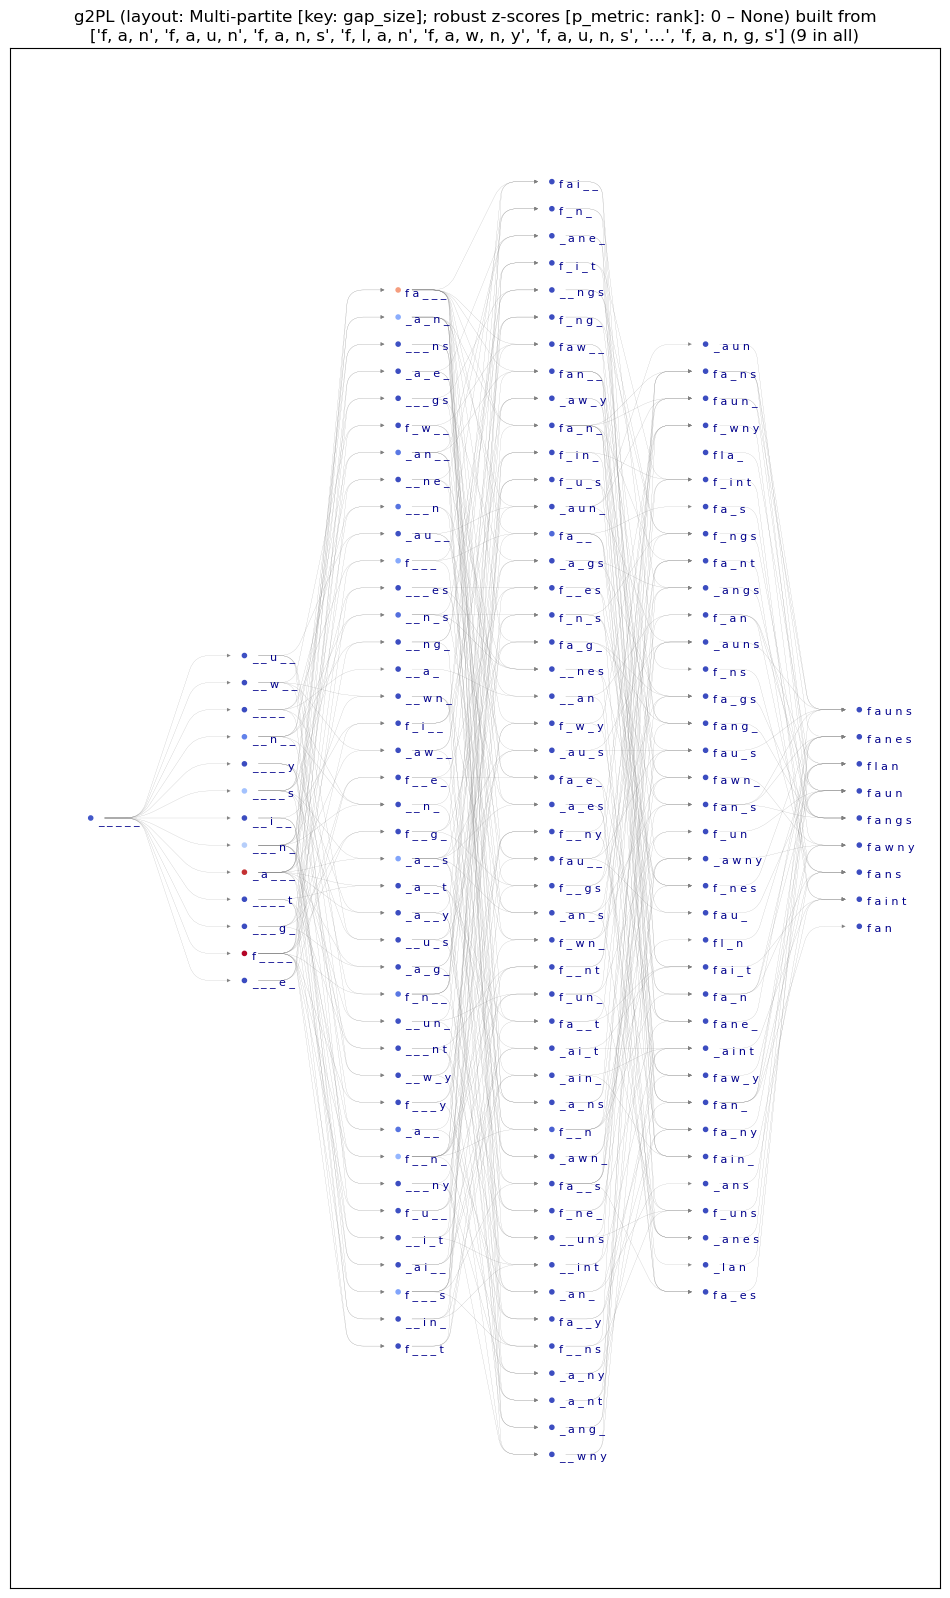

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

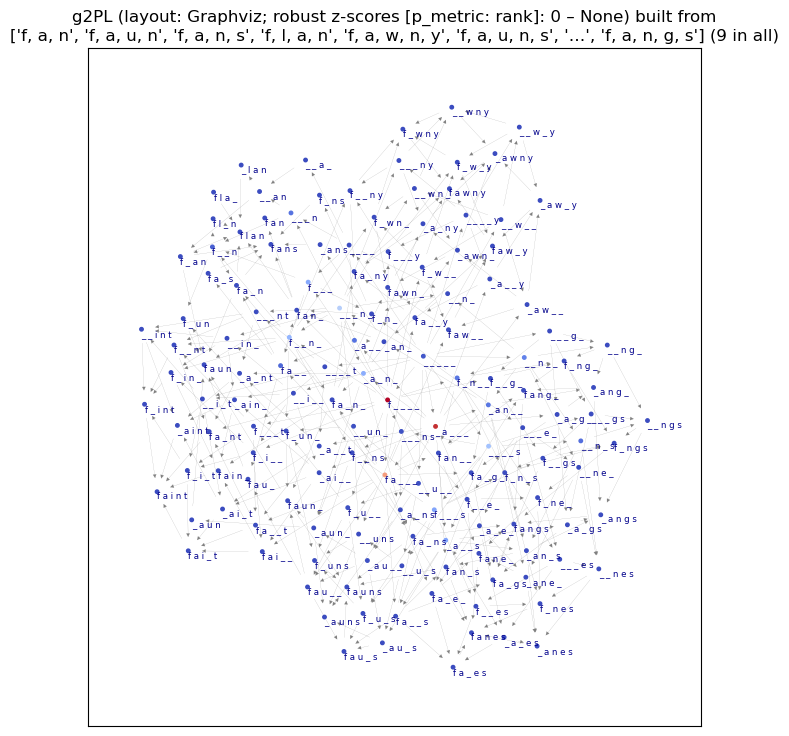

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

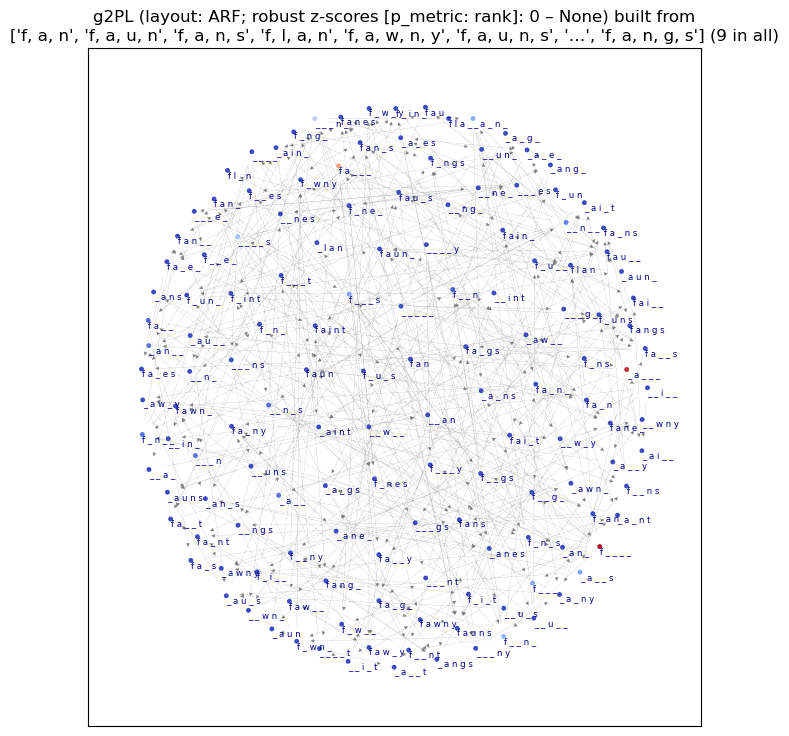

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

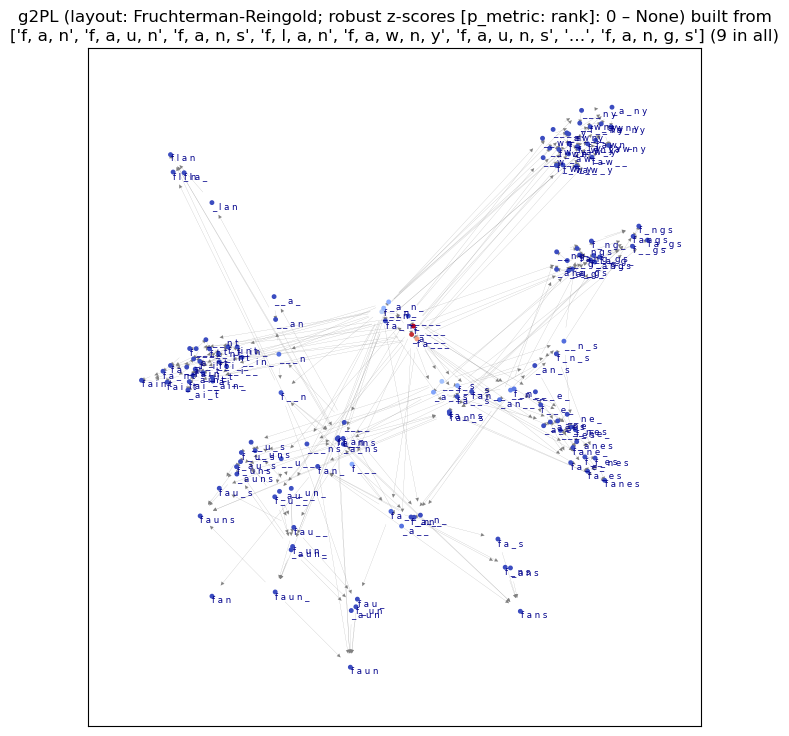

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

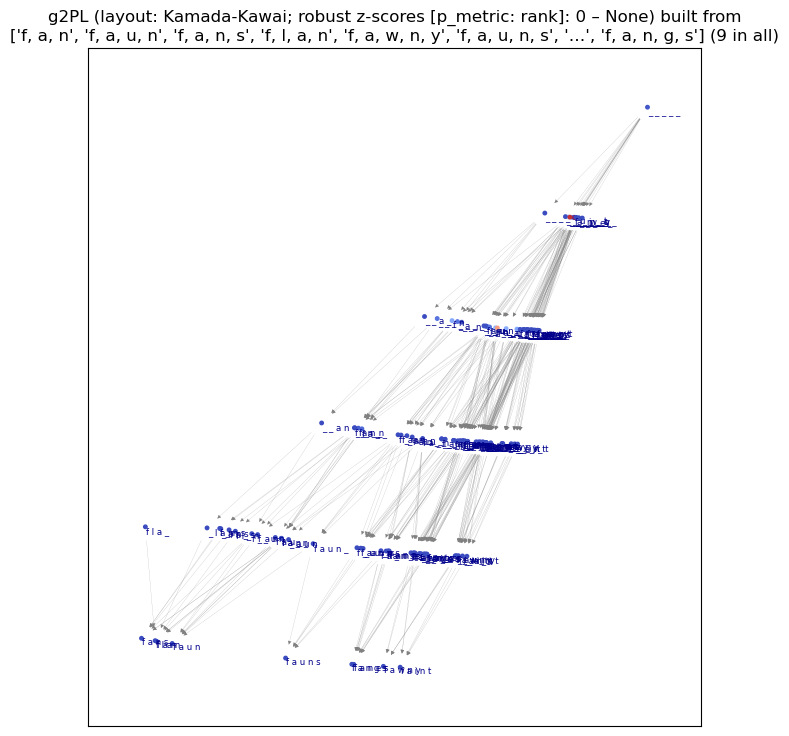

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

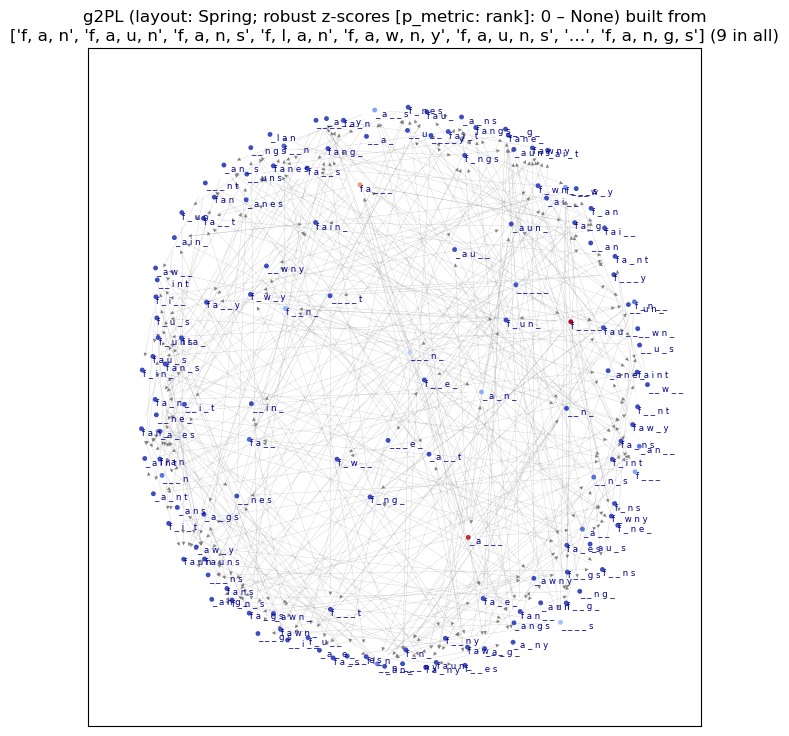

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

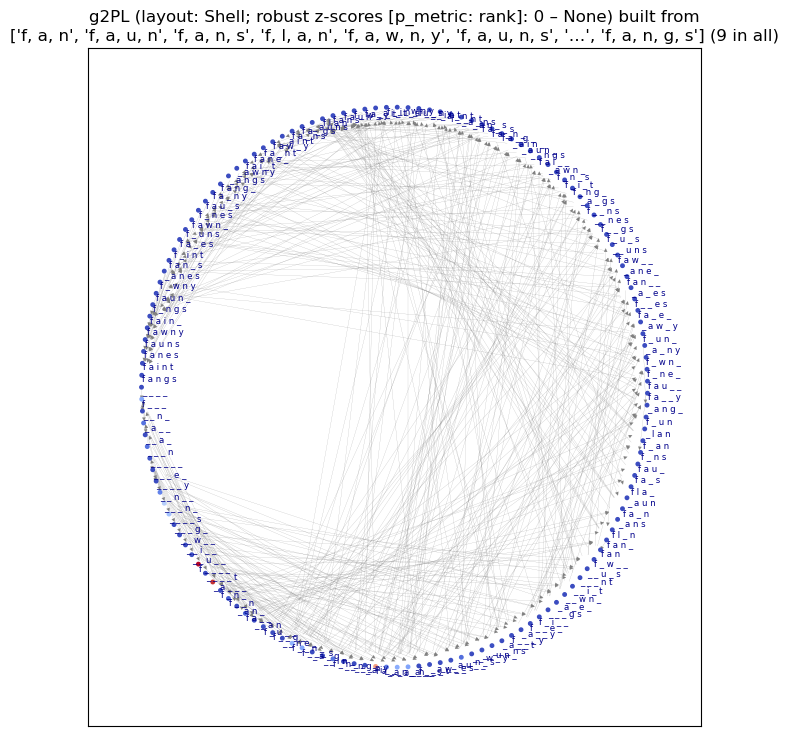

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

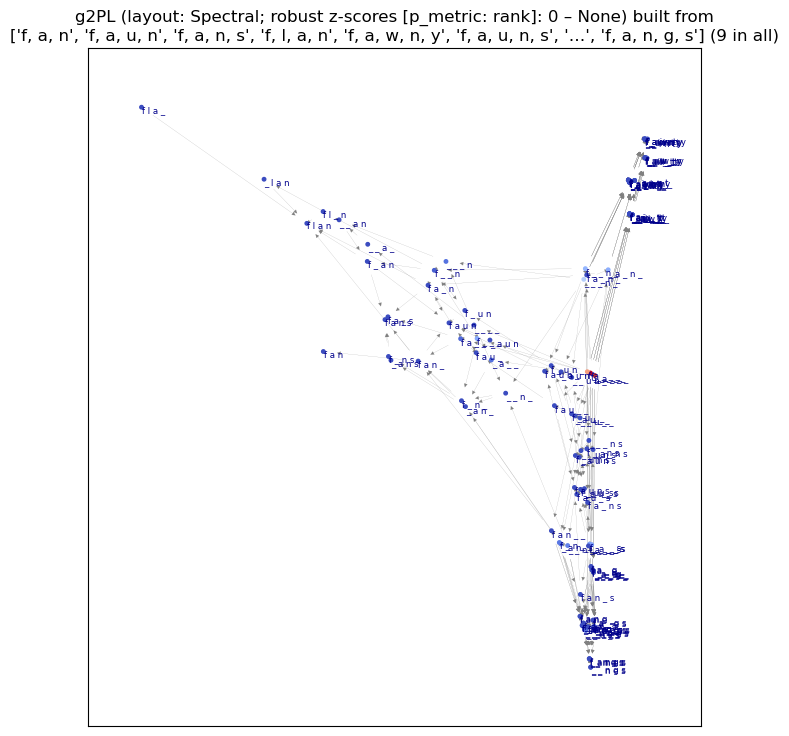

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

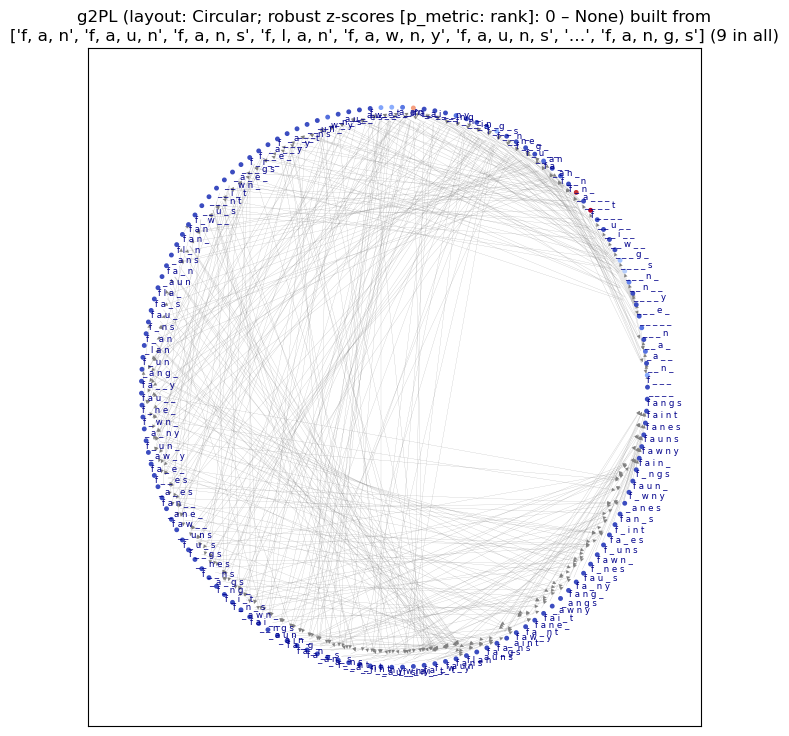

#pruned node ('_', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'n')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', '_', 'u', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', 'l', '_', '_')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('_', '_', '_', 's')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('f', '_', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('f', 'a', '_')
#pruned node ('_', 'a', '_')
#pruned node ('_', 'a', 'n')
#pruned node ('_', '_', 'n')
#pruned node ('_', 'a', 'n')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_')
#pruned node ('f', '_', '_'

NameError: name 'NetworkXException' is not defined

In [23]:
## Draw a graph of Pattern Lattice
label_sample_n = 7
for layout in graph_layouts:
   if layout == 'Multi_partite':
      set_figsize_manually = True
      if set_figsize_manually:
         M.draw_lattice (layout, MPG_key, draw_inline = True, auto_figsizing = False, fig_size = (12, 20), generality = generality, p_metric = p_metric, zscores_from_targets = zscores_from_targets, label_sample_n = label_sample_n, label_size = 12, node_size = 30, font_name = multibyte_font_name, zscore_lb = zscore_lowerbound, zscore_ub = zscore_upperbound, scale_factor = scale_factor, check = False)
      else:
         M.draw_lattice (layout, MPG_key, draw_inline = True, auto_figsizing = True, generality = generality, p_metric = p_metric, zscores_from_targets = zscores_from_targets, label_sample_n = label_sample_n, zscore_lb = zscore_lowerbound, zscore_ub = zscore_upperbound, scale_factor = scale_factor, font_name = multibyte_font_name, check = False)
   else:
      try:
         M.draw_lattice (layout, MPG_key, draw_inline = True, auto_figsizing = True, generality = generality, p_metric = p_metric, zscores_from_targets = zscores_from_targets, label_sample_n = label_sample_n, zscore_lb = zscore_lowerbound, zscore_ub = zscore_upperbound, scale_factor = scale_factor, font_name = multibyte_font_name, check = False)
      except NetworkXException as e:
         print(f"layout {layout} failed: {e}")

In [ ]:
if lattice_build_is_stepwise:
	raise "StopExecution"

TypeError: exceptions must derive from BaseException

# Process individual pattern lattices

In [ ]:
## build pattern lattices from data
Lx = [ ]
for item in data:
    pat    = plb.Pattern(item, gap_mark, tracer)
    patlat = plb.PatternLattice(pat, generality, p_metric, reflexive = reflexive)
    if verbose:
            print(patlat)
    Lx.append(patlat)

In [ ]:
## draw pattern lattices individually
if draw_individual_lattices:
    if draw_sample_lattices_only:
        Ly = random.sample(Lx, sample_lattice_n)
    else:
        Ly = Lx
    for patlat in Ly:
        patlat.draw_lattice (layout, MPG_key, draw_inline = True, auto_figsizing = True, generality = generality, font_name = multibyte_font_name)

# Process merged pattern lattice

In [ ]:
## merge pattern lattices
import functools
gen_links_internally = False # Cruciall for memory conservation
M = functools.reduce (lambda La, Lb: La.merge_with (Lb, gen_links_internally = gen_links_internally, generality = generality, reductive = reductive, reflexive = reflexive, use_mp = use_mp, show_steps = True, check = False),
                                                        Lx)

# The following process was isolated for memory conservation
if not gen_links_internally and len(M.links) == 0:
    print(f"##runnning delayed link generation ...")
    M.update_links (reflexive = reflexive, check = False)

In [ ]:
## check robust z-score distribution
import matplotlib.pyplot as plt
plt.hist(M.robust_source_zscores, bins = 20)
plt.title(f"Distribution of robust z-scores for out-going link counts")
plt.show()

In [ ]:
## check robust z-score distribution
import matplotlib.pyplot as plt
plt.hist(M.normal_source_zscores, bins = 20)
plt.title(f"Distribution of (unused) z-scores for out-going link counts")
plt.show()

In [ ]:
## check z-score distribution
import matplotlib.pyplot as plt
plt.hist(M.target_robust_zscores, bins = 20)
plt.title(f"Distribution of robust z-scores for in-coming link counts")
plt.show()

In [ ]:
## check z-score distribution
import matplotlib.pyplot as plt
plt.hist(M.target_zscores, bins = 20)
plt.title(f"Distribution of (unused) z-scores for in-coming link counts")
plt.show()

In [ ]:
## select z-score base
if zscores_from_targets:
    Link_bases = M.source_zscores
else:
    Link_bases = M.target_zscores
## check result
i = 0
for key, value in Link_bases.items():
    i += 1
    print(f"node {i:3d} {key} has z-score: {value: .4f}")

In [ ]:
## draw a pruned diagram from the merged lattice
graph_layouts = [   'Multi_partite', # 0
                    'Graphviz', # 1
                    'ARF', # 2
                    'Fruchterman_Reingold', # 3
                    'Kamada_Kawai', # 4
                    'Spring', # 5
                    'Shell', # 6
                    'Spectral', # 7
                    'Circular', # 8
                    'Planar' # 9 # often fails
                 ]
##
layout             = graph_layouts[0]
scale_factor       = 3
zscore_lowerbound  = -0.5

manually_set = True
if manually_set:
   M.draw_diagrams (generality = generality, layout = layout, auto_fig_sizing = False, fig_size = (10, 15), label_sample_n = 4, label_size = 16, node_size = 52, font_name = multibyte_font_name, zscore_lowerbound = zscore_lowerbound, scale_factor = scale_factor, check = False)
else:
   M.draw_diagrams (generality = generality, layout = layout, auto_fig_sizing = True, label_sample_n = 4, zscore_lowerbound = zscore_lowerbound, scale_factor = scale_factor, font_name = multibyte_font_name, check = False)

In [ ]:
## draw a full diagram from the merged lattice
if draw_full_version_for_merged:
    layout = graph_layouts[0]
    zscore_lowerbound  = None
    scale_factor       = 3
    ##
    adjusted = False
    if adjusted:
        M.draw_diagrams (layout = layout, zscore_lowerbound = zscore_lowerbound,
        scale_factor = scale_factor, fig_size = (24, 60), label_size = 12, node_size = 33, font_name = multibyte_font_name, check = False)
    else:
        M.draw_diagrams (layout = layout, zscore_lowerbound = zscore_lowerbound,
        scale_factor = scale_factor, font_name = multibyte_font_name, check = False)